<a href="https://colab.research.google.com/github/Estafilococo/svm/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Introducción Teórica a Support Vector Machines

### 1.1 Formulación Básica de SVM

Los **Support Vector Machines (SVM)** son algoritmos de aprendizaje supervisado diseñados inicialmente para resolver problemas de clasificación binaria. La idea principal es encontrar un **hiperplano** (en problemas linealmente separables) que maximice el margen de separación entre las clases.

- Para un dataset $ (x_i, y_i)_{i=1}^n $ con $ x_i \in \mathbb{R}^d $ y $ y_i \in \{-1, +1\} $, se busca un vector $ \mathbf{w} $ y un sesgo $ b $ que definan el hiperplano:

  $$
  \mathbf{w} \cdot x + b = 0
  $$

- El criterio de optimización en SVM (en la formulación lineal suave) se basa en minimizar

  $$
  \frac{1}{2}\,\|\mathbf{w}\|^2 \;+\; C \sum_{i=1}^n \xi_i
  $$

  sujeto a

  $$
  y_i\bigl(\mathbf{w} \cdot x_i + b\bigr) \;\geq\; 1 - \xi_i,\quad \xi_i \;\geq\; 0.
  $$

- $C$ es un hiperparámetro que controla la penalización del error en la clasificación.  
  Las $ \xi_i $ son las variables de holgura que permiten errores de clasificación o puntos dentro del margen.

### 1.2 El Concepto de Kernel y la Función de Transformación

Cuando los datos no son linealmente separables en el espacio original, se utiliza la **“trampa del kernel”** (*kernel trick*).  
En lugar de proyectar explícitamente los datos a un espacio de mayor dimensión con una función $ \phi $, se usa una función núcleo (kernel) $ K(x_i, x_j) $ que calcula el producto punto en ese espacio aumentado de forma implícita:

$$
K(x_i, x_j) = \phi(x_i) \cdot \phi(x_j).
$$

Esto permite que el clasificador sea no lineal en el espacio original sin incurrir en gran costo computacional, siempre y cuando se pueda calcular $ K(x_i, x_j) $ de forma eficiente.



---



## 2. Tipos de Kernels Comunes

### 2.1 Kernel Lineal

$$
K(x_i, x_j) = x_i \cdot x_j
$$

- Es el más sencillo. Corresponde a la SVM lineal clásica.  
- Útil cuando los datos están (o se espera que estén) separados linealmente o cuando la dimensionalidad es muy alta.

### 2.2 Kernel Polinomial

$$
K(x_i, x_j) = (\gamma \, x_i \cdot x_j + r)^d
$$

- Permite dar forma de curvatura a la frontera de decisión.  
- Hiperparámetros principales: grado $d$, término de sesgo $r$, y factor de escala $\gamma$.

### 2.3 Kernel RBF

$$
K(x_i, x_j) = \exp\bigl(-\gamma \,\|x_i - x_j\|^2\bigr)
$$

- También conocido como **Gaussian Kernel**.  
- Es quizás el más utilizado en la práctica, ya que puede adaptarse a fronteras de clasificación altamente no lineales.  
- El hiperparámetro $\gamma$ controla la amplitud de la “campana” gaussiana.

### 2.4 Kernel Sigmoide

$$
K(x_i, x_j) = \tanh(\gamma \, x_i \cdot x_j + r)
$$

- Similar a una red neuronal de una sola capa (función de activación sigmoide).  
- Puede ser más difícil de parametrizar y estabilizar.

---

## 3. Implementación en Python

### 3.1 Instalación y Carga de Bibliotecas


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from mpl_toolkits.mplot3d import Axes3D  # Para visualizaciones 3D si se requiere

sns.set(style="whitegrid")

### 3.2 Generación/Importación del Conjunto de Datos

Para ilustrar los distintos kernels, usaremos datasets sintéticos de *scikit-learn* que no son linealmente separables en el espacio original:

- **make_moons**: Formas de media luna.  
- **make_circles**: Círculos concéntricos.  
- **make_classification**: Datos linealmente separables (o parcialmente separables) personalizables.

In [11]:
# Generamos datos con forma de "medias lunas"
X, y = make_moons(n_samples=500, noise=0.1, random_state=42)

# Dividimos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

print("Tamaño de X_train:", X_train.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño de X_train: (350, 2)
Tamaño de y_train: (350,)
Tamaño de X_test: (150, 2)
Tamaño de y_test: (150,)


### 3.3 Entrenamiento y Comparación de Kernels

Entrenaremos múltiples SVM variando el kernel (lineal, polinomial, RBF y sigmoide) y compararemos el rendimiento en train/test.

In [12]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
models = {}
scores_train = {}
scores_test = {}

for k in kernels:
    # Definimos la SVM con el kernel k
    svm = SVC(kernel=k, random_state=42)
    svm.fit(X_train, y_train)

    # Guardamos el modelo
    models[k] = svm

    # Evaluamos en train y test
    scores_train[k] = svm.score(X_train, y_train)
    scores_test[k] = svm.score(X_test, y_test)

# Imprimimos los resultados
for k in kernels:
    print(f"Kernel: {k}")
    print(f"  Exactitud en Training: {scores_train[k]:.3f}")
    print(f"  Exactitud en Test:     {scores_test[k]:.3f}\n")

Kernel: linear
  Exactitud en Training: 0.869
  Exactitud en Test:     0.873

Kernel: poly
  Exactitud en Training: 0.929
  Exactitud en Test:     0.927

Kernel: rbf
  Exactitud en Training: 1.000
  Exactitud en Test:     1.000

Kernel: sigmoid
  Exactitud en Training: 0.657
  Exactitud en Test:     0.607



### 3.4 Visualización de Fronteras de Decisión

Para entender las diferencias entre kernels, es ilustrativo ver las fronteras de decisión en 2D. Usamos un *meshgrid* y predecimos las clases en cada punto:

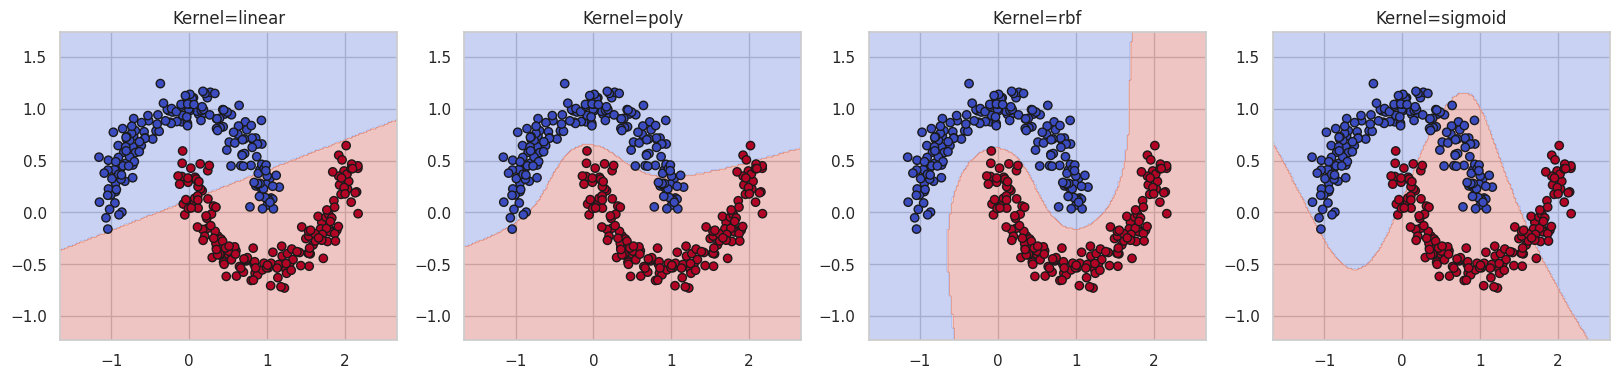

In [13]:
def plot_decision_boundary(model, X, y, ax, title):
    # Generar malla
    x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
    y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # Predecir
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot de contornos
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    # Plot de puntos
    ax.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    ax.set_title(title)

fig, axes = plt.subplots(1, 4, figsize=(20,4))

for i, k in enumerate(kernels):
    plot_decision_boundary(models[k], X_train, y_train, axes[i], f"Kernel={k}")

plt.show()

### 3.5 Búsqueda de Hiperparámetros (GridSearchCV)

Los kernels polinomial, RBF y sigmoide tienen hiperparámetros adicionales ($C$, $\gamma$, grado $d$, término de bias $r$). Para encontrar la mejor combinación podemos usar `GridSearchCV`.

Ejemplo con el kernel RBF:


In [14]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10]
}

svm_rbf = SVC(kernel='rbf', random_state=42)
grid_search = GridSearchCV(svm_rbf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Mejor combinación de hiperparámetros (RBF):", grid_search.best_params_)
print("Mejor puntaje de validación (RBF):", grid_search.best_score_)

best_rbf_model = grid_search.best_estimator_
test_score = best_rbf_model.score(X_test, y_test)
print("Exactitud en Test con mejor modelo RBF:", test_score)

Mejor combinación de hiperparámetros (RBF): {'C': 0.1, 'gamma': 10}
Mejor puntaje de validación (RBF): 1.0
Exactitud en Test con mejor modelo RBF: 1.0


Para kernels polinomial o sigmoide, se pueden agregar más parámetros (por ejemplo, `degree` o `coef0`), ajustando el diccionario `param_grid` de manera apropiada:

In [15]:
param_grid_poly = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'degree': [2, 3, 4],
    'coef0': [0, 1]
}
svm_poly = SVC(kernel='poly', random_state=42)
grid_search_poly = GridSearchCV(svm_poly, param_grid_poly, cv=5, n_jobs=-1)
grid_search_poly.fit(X_train, y_train)

print("Mejor combinación de hiperparámetros (Polinomial):", grid_search_poly.best_params_)
print("Mejor puntaje de validación (Polinomial):", grid_search_poly.best_score_)

Mejor combinación de hiperparámetros (Polinomial): {'C': 0.1, 'coef0': 1, 'degree': 4, 'gamma': 1}
Mejor puntaje de validación (Polinomial): 1.0


### 3.6 Uso de un Kernel Personalizado

En *scikit-learn*, podemos definir funciones núcleo personalizadas. Se debe usar `kernel='precomputed'` o bien pasar directamente una función usando la clase `SVC` con `kernel=callable`.

Por ejemplo, un kernel que combine un polinomial y un RBF (solo como ejemplo demostrativo):

In [16]:
from sklearn.metrics.pairwise import rbf_kernel, polynomial_kernel

def custom_kernel(X, Y):
    # Por ejemplo, suma de un kernel RBF y un kernel polinomial
    rbf_part = rbf_kernel(X, Y, gamma=0.5)
    poly_part = polynomial_kernel(X, Y, degree=3, gamma=1, coef0=1)
    return rbf_part + poly_part

# Entrenamos un modelo con kernel personalizado
svm_custom = SVC(kernel=custom_kernel)
svm_custom.fit(X_train, y_train)

print("Exactitud con kernel personalizado en Training:",
      svm_custom.score(X_train, y_train))
print("Exactitud con kernel personalizado en Test:",
      svm_custom.score(X_test, y_test))

Exactitud con kernel personalizado en Training: 1.0
Exactitud con kernel personalizado en Test: 1.0


---
## 4. Discusión de Resultados

1. **Trade-off entre el ajuste y la complejidad**  
   - El parámetro $C$ controla el peso de los errores de clasificación. Un $C$ muy alto penaliza fuertemente los errores, pudiendo llevar a *overfitting*.  
   - En conjunto con kernels más complejos como RBF o polinomial, hay que prestar especial atención a la *validación cruzada* para evitar un sobreajuste que no generalice bien.

2. **Interpretación de la frontera de decisión**  
   - Con kernel lineal, es fácil interpretar el hiperplano resultante, pues está definido por $\mathbf{w}$ y $b$.  
   - Con kernels no lineales, la frontera de decisión es más complicada de interpretar debido a la transformación implícita en espacios de alta dimensión.

3. **Características numéricas, escalado y normalización**  
   - Para kernels como RBF y polinomial, se recomienda escalar los datos (por ejemplo, con `StandardScaler`) antes de entrenar la SVM, ya que la magnitud de las características afecta la distancia y, por ende, el valor del kernel.

4. **Extrapolación a problemas multicategoría**  
   - SVM se puede generalizar a problemas con múltiples clases usando esquemas *One-vs-Rest* (OvR) o *One-vs-One* (OvO). Scikit-learn maneja esto automáticamente.

5. **Coste computacional**  
   - El entrenamiento de SVM puede ser costoso para conjuntos de datos muy grandes ($n$ en el orden de cientos de miles o millones), pues en el peor caso la complejidad es del orden $O(n^3)$. Existen variantes (SVM lineal, métodos aproximados) para escalas muy grandes.

---

## 5. Conclusiones

- El uso de **kernels** en SVM es fundamental para **capturar relaciones no lineales** en los datos.  
- La elección adecuada del kernel (lineal vs. RBF vs. polinomial vs. sigmoide) depende de la **naturaleza de los datos** y del **propósito del modelo**.  
- La **búsqueda de hiperparámetros** (como $C$, $\gamma$, grado polinomial, etc.) es clave para obtener un rendimiento óptimo y evitar *overfitting/underfitting*.  
- El diseño de **kernels personalizados** permite incorporar conocimiento experto del dominio o combinar propiedades de distintos kernels.

---

## 6. Referencias

- **Cortes, C., & Vapnik, V. (1995).** *Support-vector networks.* Machine learning, 20(3), 273-297.  
- **Schölkopf, B., & Smola, A. J. (2001).** *Learning with kernels: support vector machines, regularization, optimization, and beyond.* MIT press.  
- **Boser, B. E., Guyon, I. M., & Vapnik, V. N. (1992).** *A training algorithm for optimal margin classifiers.* In Proceedings of the fifth annual workshop on Computational learning theory (pp. 144-152).  
- Documentación oficial de [scikit-learn: SVM](https://scikit-learn.org/stable/modules/svm.html).  


